ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA) — Telco Customer Churn Dataset

This notebook applies the Lab 3 EDA steps to **Dataset.xlsx** (Telco customer churn data).

**Target variable:** `Churn` (Yes/No)

We will:
- Inspect the dataset
- Check missing values & duplicates
- Clean/convert data types (especially `TotalCharges`)
- Produce descriptive statistics
- Run univariate & bivariate analysis
- Explore correlations (numeric features)


In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [50]:
file_path = "Dataset.xlsx"   
df_raw = pd.read_excel(file_path)
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_raw.shape

(7043, 21)

## Check Missing Values

In [4]:
df_raw.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

## Check Duplicate Rows

In [5]:
df_raw.duplicated().sum()

0

## Data Types of Columns

In [6]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Cleaning / Type Fixes

`TotalCharges` is commonly stored as text and may contain blank spaces for new customers (tenure = 0).  
We will:
1) strip spaces
2) convert to numeric
3) fill missing `TotalCharges` using `MonthlyCharges * tenure` (reasonable for tenure=0 cases)


In [7]:
df = df_raw.copy()

# Clean TotalCharges
df["TotalCharges"] = df["TotalCharges"].astype(str).str.strip()
df.loc[df["TotalCharges"].isin(["", "nan", "None"]), "TotalCharges"] = np.nan
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges (mostly for tenure=0 customers)
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"])

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Descriptive Summary Statistics

In [8]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [9]:
df.describe(include=["object"]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Target Distribution (Churn)

In [10]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
churn_rate = (df["Churn"].str.strip().str.lower() == "yes").mean()
churn_rate

0.2653698707936959

## Univariate Analysis

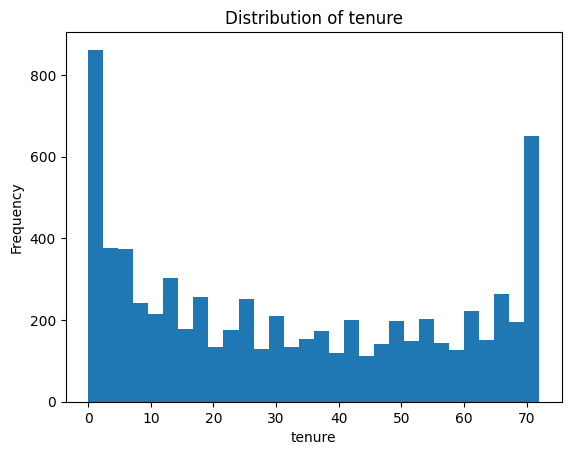

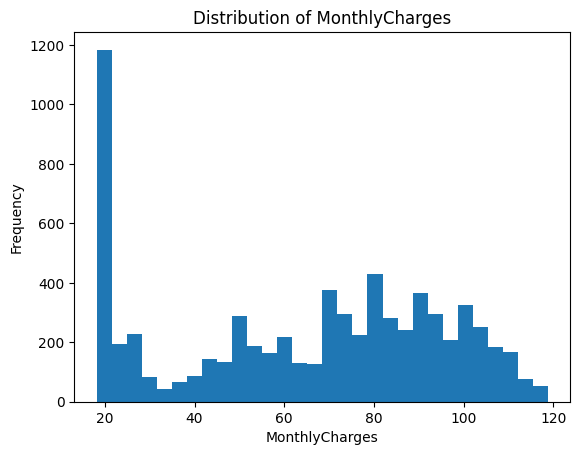

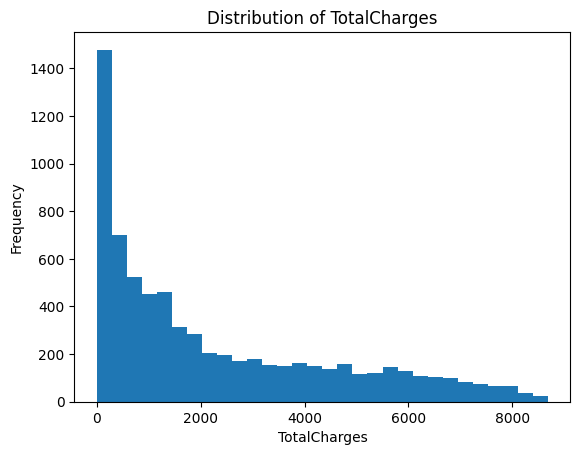

In [12]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

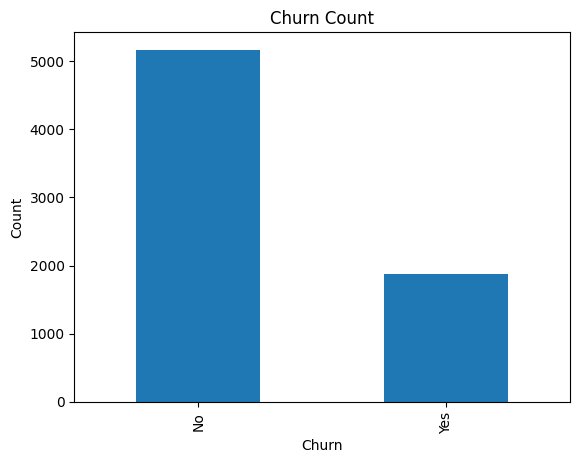

In [13]:
# Churn distribution (bar)
plt.figure()
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

In [14]:
# Helper: churn rate by category
df_tmp = df.copy()
df_tmp["ChurnFlag"] = (df_tmp["Churn"].str.strip().str.lower() == "yes").astype(int)

def churn_rate_by(col):
    return df_tmp.groupby(col)["ChurnFlag"].mean().sort_values(ascending=False)

churn_rate_by("Contract")

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: ChurnFlag, dtype: float64

In [15]:
churn_rate_by("InternetService")

InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: ChurnFlag, dtype: float64

In [16]:
churn_rate_by("PaymentMethod")

PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: ChurnFlag, dtype: float64

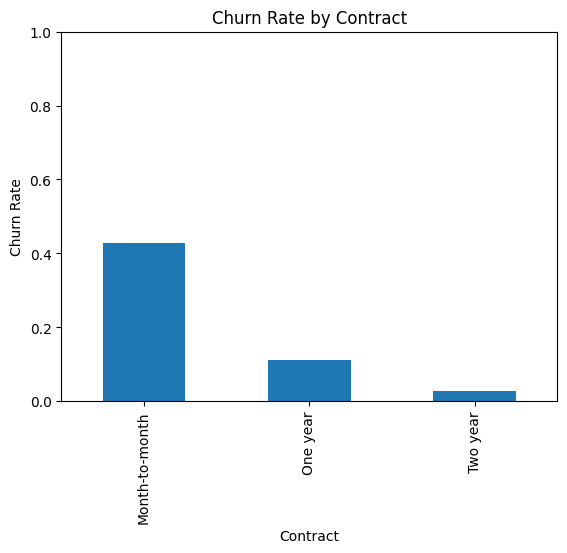

In [17]:
# Bar chart: churn rate by Contract
plt.figure()
churn_rate_by("Contract").plot(kind="bar")
plt.title("Churn Rate by Contract")
plt.xlabel("Contract")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()

<Figure size 640x480 with 0 Axes>

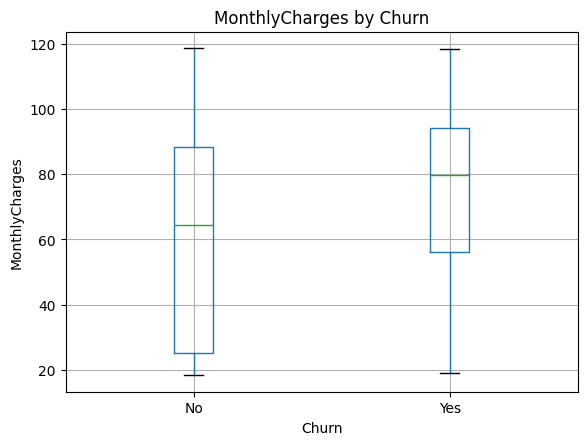

In [18]:
# Boxplot: MonthlyCharges by Churn
plt.figure()
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("MonthlyCharges by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.show()

## Correlation Matrix (Numeric Only)

In [19]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


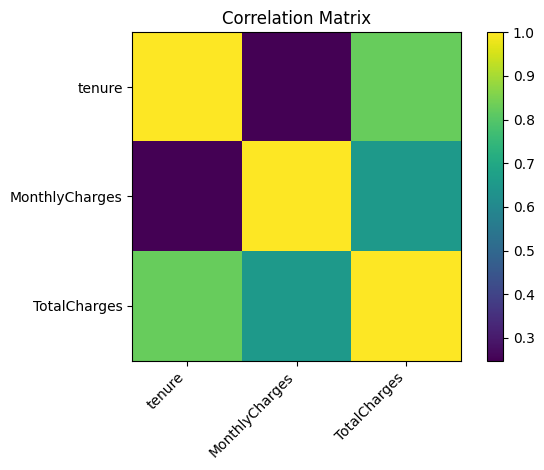

In [20]:
# Correlation heatmap (matplotlib only)
plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.tight_layout()
plt.show()

## Time-Based Analysis (Using Tenure as a Time Proxy)

This dataset does not include calendar dates, so we use **tenure (months)** as a proxy for time to understand how churn changes as customers stay longer.

---

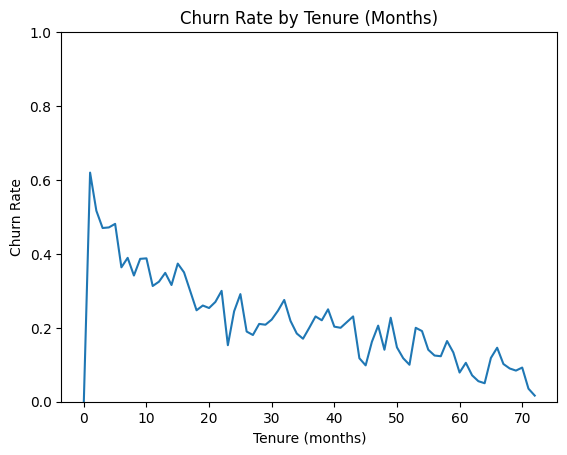

C:\Users\7Mod3\AppData\Local\Temp\ipykernel_7424\1963361051.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_bin = df_time.groupby("TenureBin")["ChurnFlag"].mean()


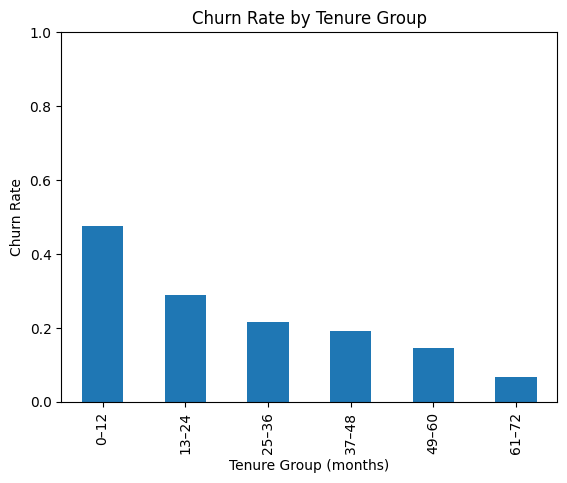

In [21]:
# Churn trend over tenure (months) as a time proxy
df_time = df.copy()
df_time["ChurnFlag"] = (df_time["Churn"].str.strip().str.lower() == "yes").astype(int)

# Churn rate by exact tenure month
churn_by_tenure = df_time.groupby("tenure")["ChurnFlag"].mean()

plt.figure()
plt.plot(churn_by_tenure.index, churn_by_tenure.values)
plt.title("Churn Rate by Tenure (Months)")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()

# Optional: churn rate by tenure bins (easier to interpret)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
df_time["TenureBin"] = pd.cut(df_time["tenure"], bins=bins, labels=labels, include_lowest=True, right=True)

churn_by_bin = df_time.groupby("TenureBin")["ChurnFlag"].mean()

plt.figure()
churn_by_bin.plot(kind="bar")
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group (months)")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()


## Quick Insights (From This Dataset)

- Overall churn rate is around **26.5%**.
- Churn is generally **higher at lower tenure** (newer customers) and decreases as tenure increases.
- Highest churn is among **Month-to-month** contracts.
- Customers with **Fiber optic** internet show higher churn vs DSL/No internet.
- **Electronic check** payment method has the highest churn rate among payment methods.